GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s03  0005  -2.211545e+02   3.198935e+03 
    00s10  0016  -2.945570e+02   8.024028e+01 
    00s14  0024  -2.985858e+02   8.013846e-01 
    00s17  0030  -2.986008e+02   3.820808e-09 
Runtime:     00s17
Optimization status: Converged

Optimization restart 1/10, f = -298.600776596
Optimization restart 2/10, f = -298.600776595
Optimization restart 3/10, f = -298.600776597
Optimization restart 4/10, f = -298.600776589
Optimization restart 5/10, f = -298.600776514
Optimization restart 6/10, f = -298.600776593
Optimization restart 7/10, f = -298.600776596
Optimization restart 8/10, f = -298.600776596
Optimization restart 9/10, f = -298.600776593
Optimization restart 10/10, f = -298.600776594


GP_regression.,value,constraints,priors
rbf.variance,7.153824568160421,+ve,
rbf.lengthscale,3.157095897460528,+ve,
Gaussian_noise.variance,1.7249452367004224e-05,+ve,


 /anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


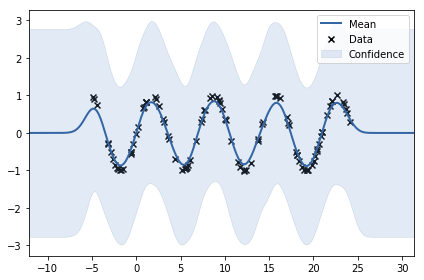

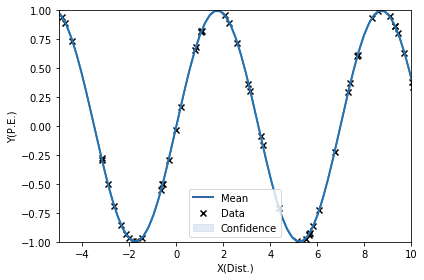

In [2]:
# Toy Problem: Gaussian Process - for Coarse-Grain Potential Development (Test case...)
# Berkeley National Lab, Summer 2018
# University of Saint Mary

import numpy as np
from matplotlib import pyplot as plt
import GPy
from IPython.display import display

d = 1 # input dimension
var = 1 # variance
theta = 1 # 0.2 # lengthscale

InFileName = 'BiomolecularData.txt'   # Any data file that you want to test (Data has to be a two column vector!!)
f = open(InFileName, 'r')
N = len(f.readlines())  # number of observed points.
f.close()

X = np.zeros(shape=(N,1))
Y = np.zeros(shape=(N,1))

#------------------------------------
# Open the file and read data points from the file

InFile = open(InFileName, 'r')
LineNumber = 0
for Line in InFile:
    #Remove the lin-ending characters
    Line = Line.strip('\n')
    row = Line.split()
    #Index the counter used to keep track of line number
    X[LineNumber] = float(row[0])
    Y[LineNumber] = float(row[1])
    LineNumber += 1
#After the loop is completed., close the file
InFile.close()
# -----------------------------------

# plt.scatter(X, Y)
# plt.axis([0, 1.5, -2, 15])

kernel = GPy.kern.RBF(d, var, theta)

#m = GPy.models.SparseGPRegression(X,Y,kernel)
m = GPy.models.GPRegression(X,Y,kernel)

fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook')
display(m)

m.optimize(messages=True)
m.optimize_restarts(num_restarts = 10)

fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')
display(m)

# fig = m.plot(plot_density=True)
# GPy.plotting.show(fig, filename='basic_gp_regression_density_notebook_optimized')
# display(m)

m.predict(m.X)

Xp = np.arange(-5,10,0.002).reshape(-1,1)
Yp = m.predict(Xp)

plt.axis([-5, 10, -1, 1])
plt.plot(Xp,Yp[0])
plt.ylabel('Y(P.E.)')
plt.xlabel('X(Dist.)')
plt.show()

Dataout = np.column_stack((Xp,Yp[0]))
np.savetxt('CGPotential.dat',(Dataout),fmt=('%10.5f', '%12.6f'))
